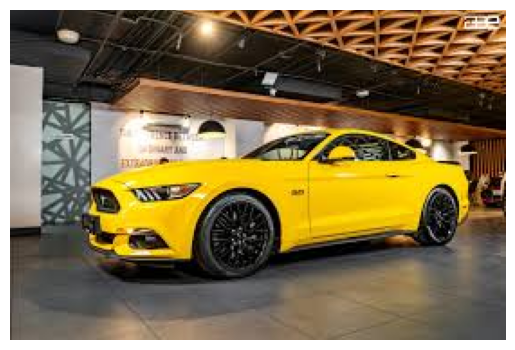

Predicted class: sports car


In [13]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import matplotlib.pyplot as plt
import requests

# Load GoogLeNet pretrained on ImageNet
googlenet = models.googlenet(weights="IMAGENET1K_V1")
googlenet.eval()

# ImageNet class labels
url = "https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt"
labels = requests.get(url).text.splitlines()

# Preprocessing for GoogLeNet
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

# Load your image
img_path = r"C:\Users\haris\Downloads\car.jpeg"
img = Image.open(img_path)
plt.imshow(img)
plt.axis("off")
plt.show()

# Transform
input_tensor = preprocess(img).unsqueeze(0)  # Add batch dimension

# Prediction
with torch.no_grad():
    outputs = googlenet(input_tensor)
    _, predicted = outputs.max(1)

print(f"Predicted class: {labels[predicted.item()]}")
